# Project


<p>A home builder is interested in constructing a number of homes in King County WA, USA. The builder will invest in the construction of homes which they then hope to sell at a profit. Understandably, the builder would like to understand which variables determine the value of any homes they plan to build so that they can maximize return from their investment.</p> </div>

## The Data Set

For this challenge, a public domain data set is available from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). These data include all home sales in King Co WA from May 2014 to May 2015. 

***
**Note:** the following packages were installed for this challenge exercise:

- tidyverse
- hexbin
- repr

***

## Load and Prepare the Data Set

I loaded and performed some basic preparation of these data using the `dplyr` package.

1. I Read the csv file, verifying that the file read correctly. 
2. For variables where are fundamentally categorical, like `bedrooms`, `grade` and `zipcode`, I computed new columns of type factor.  
3. I then verified that data types of the columns are as expected.

<div class="alert alert-block alert-success">The code to perform these steps is below: </div>

In [1]:
## A possible solution is here:
##
## Change the full path to the  file. If in working directory use ''.
read.house = function(file = 'kc_house_data.csv'){
  require(tidyverse)
  house = read_csv(file)
  house = house %>% mutate(bedrooms_fac = as.factor(bedrooms), 
                           bathrooms_fac = as.factor(bathrooms), 
                           floors_fac = as.factor(floors), 
                           waterfront_fac = as.factor(waterfront), 
                           view_fac = as.factor(view), 
                           condition_fac = as.factor(condition), 
                           grade_fac = as.factor(grade), 
                           zipcode_fac = as.factor(zipcode))
  house
}
house = read.house()
glimpse(house)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 29
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

Next, using ggplot2, I created a histogram to provide a visual estimation of the `price` column.  

**Note:** 
I will be creating other histograms, so this function will work for any column name specified. 

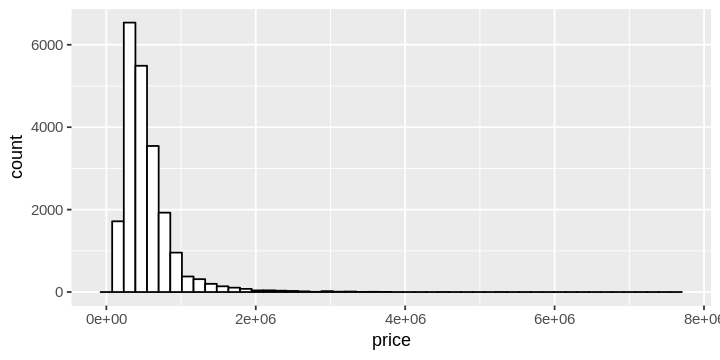

In [9]:

hplot0 <- ggplot(house, aes(x=price)) +   
     geom_histogram(aes(y=..count..), bins=50, color="black", fill="white") 
  
print(hplot0)

options(repr.plot.width=6, repr.plot.height=3) ## set the plot area size


<div class="alert alert-block alert-info">
Observations:</div>

This distribution is left skewed and has a right tail. 

Performing a log transformation of these values will create a distribution closer to Normal. 

To understand and model the factors determining home price it is necessary to transform this label value. In the cell below, functions from the tidyverse were used to do the following:

1. Compute a new column in the data frame containing the natural log transformation of the `price` column.
2. Plot the histogram and/or density function for the transformed column. 

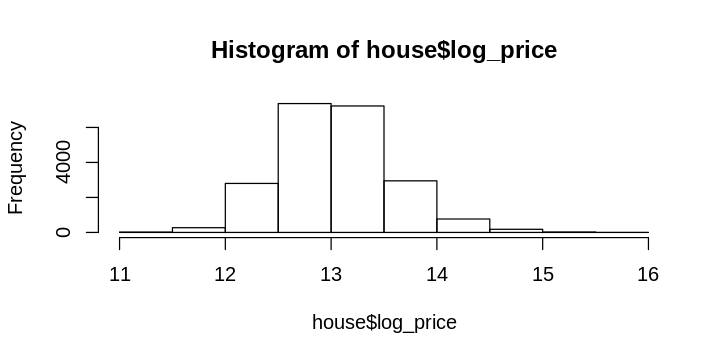

In [10]:
house <- house %>% mutate(log_price = log(house$price))

#glimpse(house)

hist(house$log_price)



## Explore the Relationships in the Data

I will now use a series of plots to visualize these data and understand the relationships.   

### Univariate plots
First, I used ggplot2 create a series of histograms for the following features:
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built

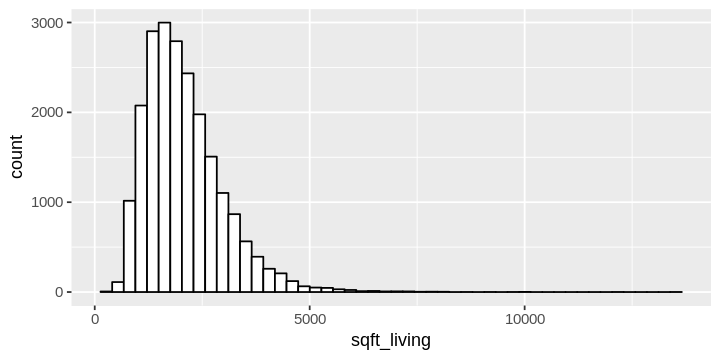

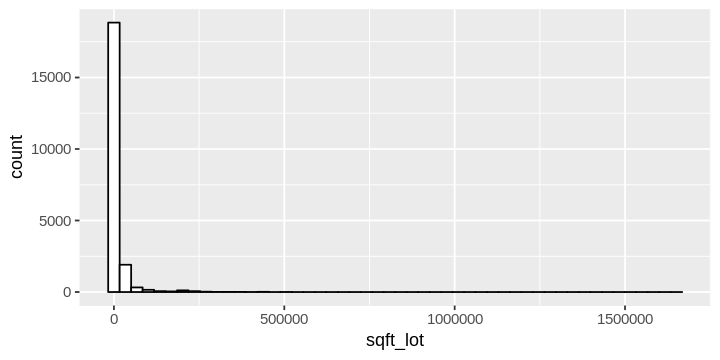

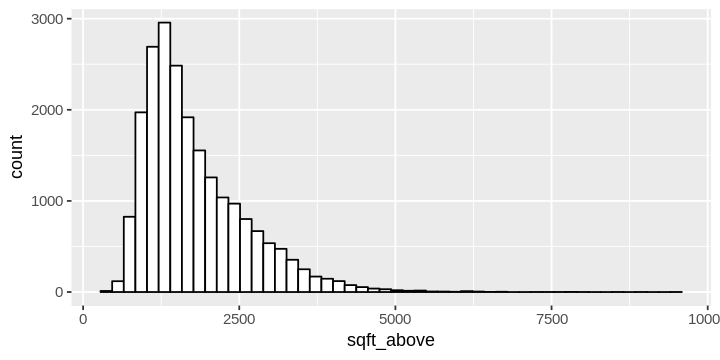

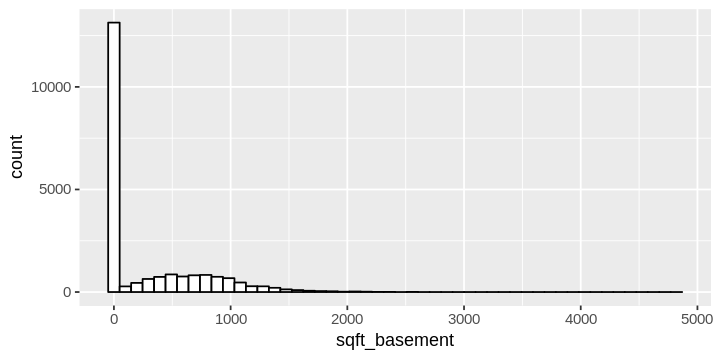

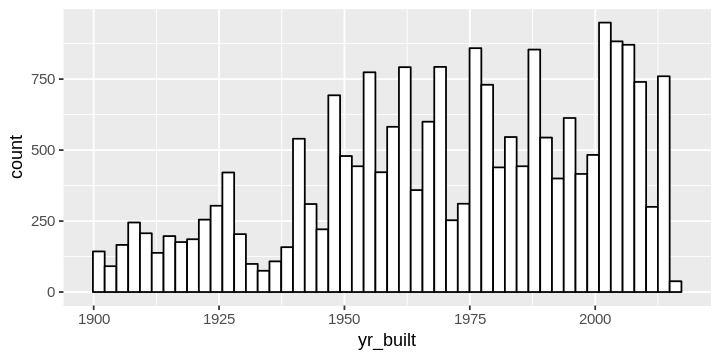

In [11]:
hplots <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built")

# Create a for loop and call gg_histogram
# Use house and hplots

for(hplots in hplots) {

# Assigning ggplot() to an object will allow us to examine internal details.
gg_histogram <- ggplot(house, aes_string(x=hplots), environment = environment()) +   
                geom_histogram(aes(y=..count..),      
                  bins=50,
                  color="black", fill="white")  

#plot histogram
print(gg_histogram)
}

<div class="alert alert-block alert-info">Observations:</div>

sqft_basement & sqft_lot are dominated by zero values 

sqft_above & sqft_living are strongly left skewed 
    

### Bivariate plots

Now, I will create a series of plots to explore the relationship between the transformed label and some features in the data set. I used ggplot2 to create a series of scatter plots for the numeric features.

**Notes:** 
I used a high transparency value, e.g. `alpha = 0.1` to deal with the overplotting.


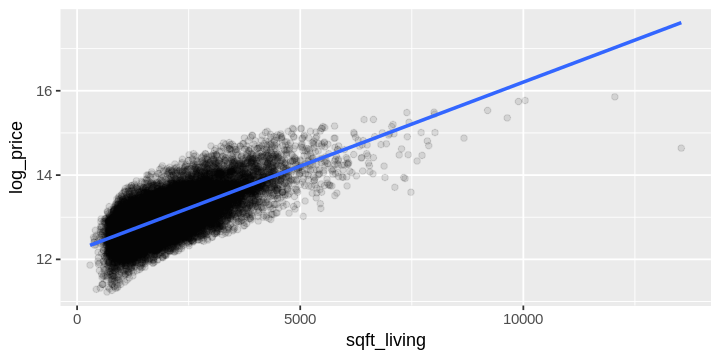

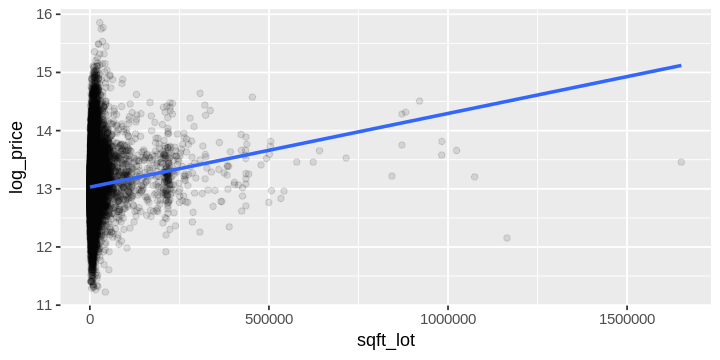

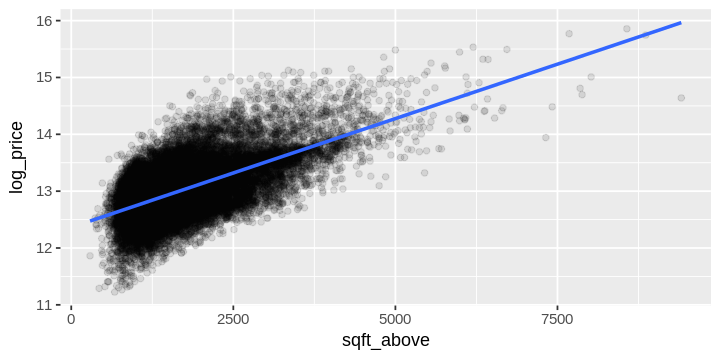

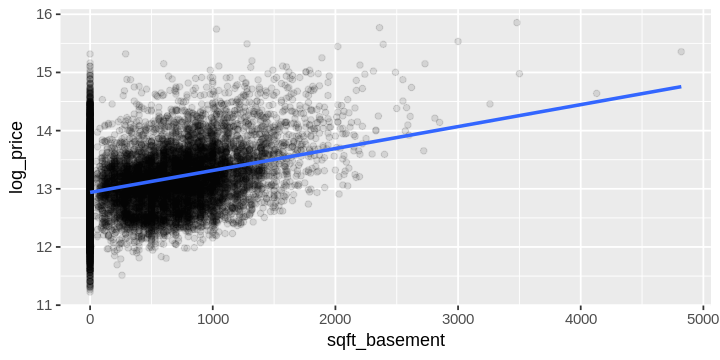

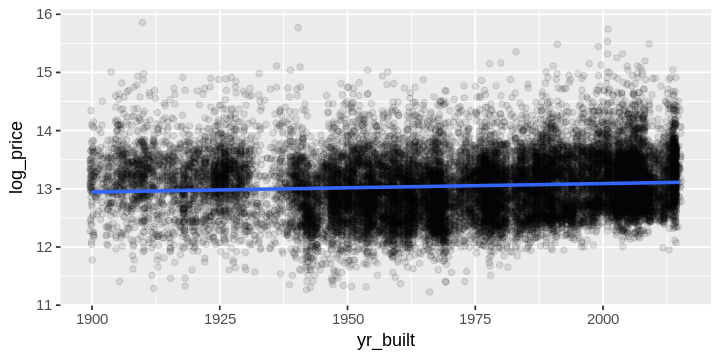

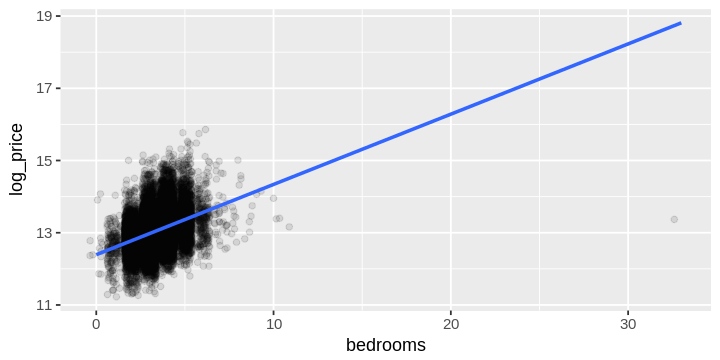

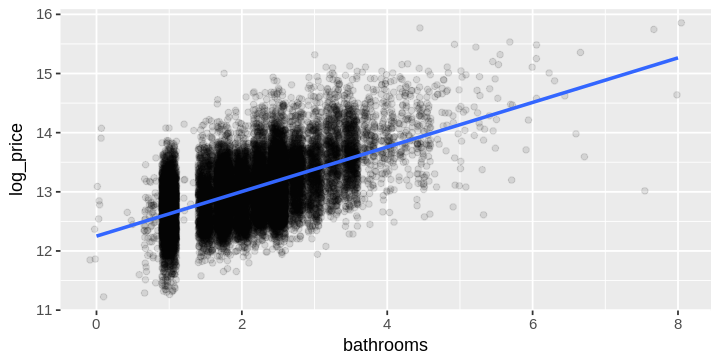

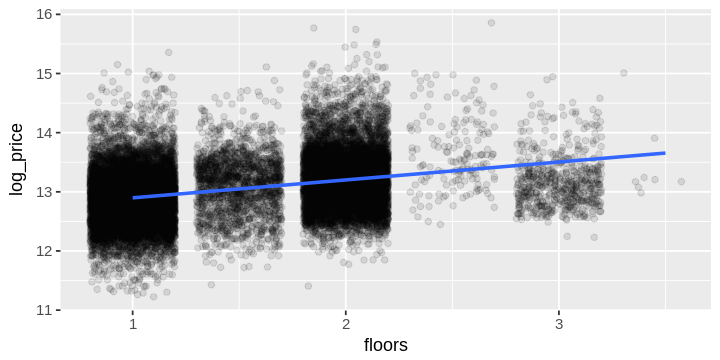

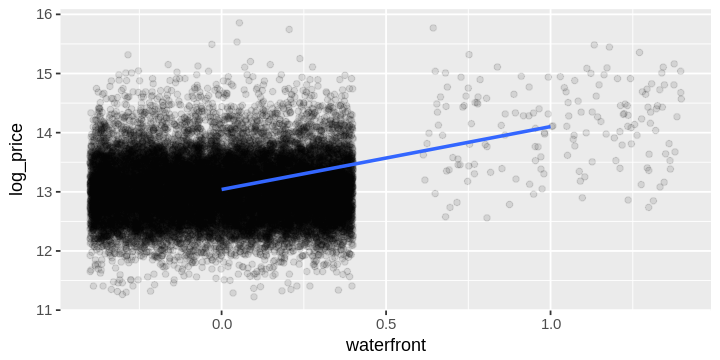

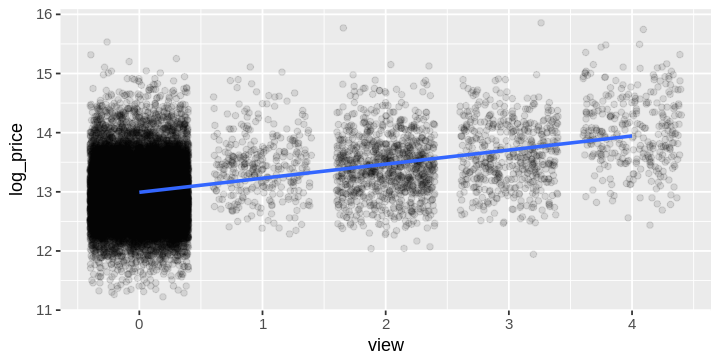

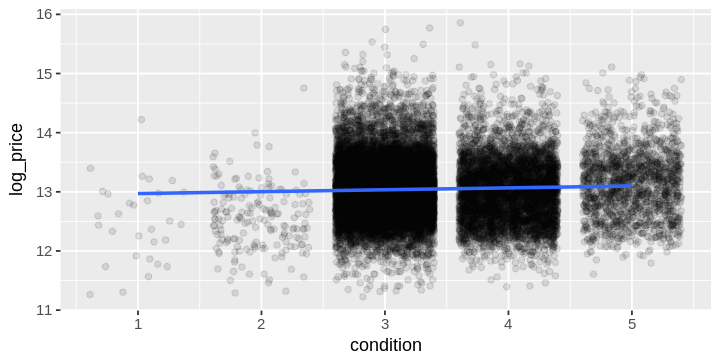

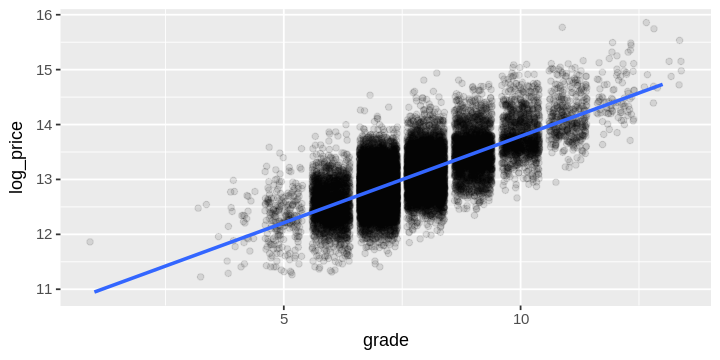

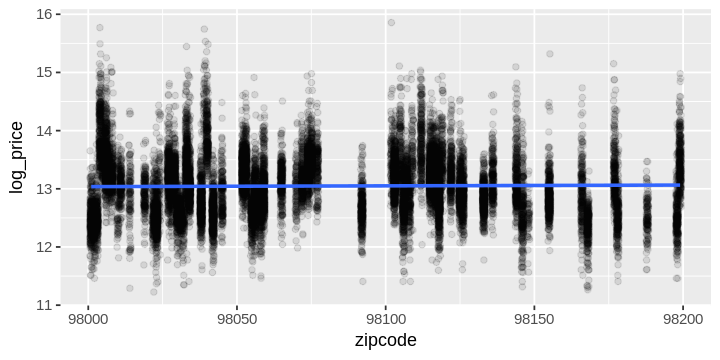

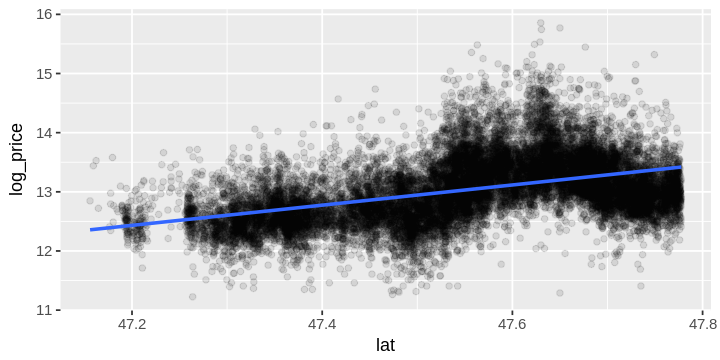

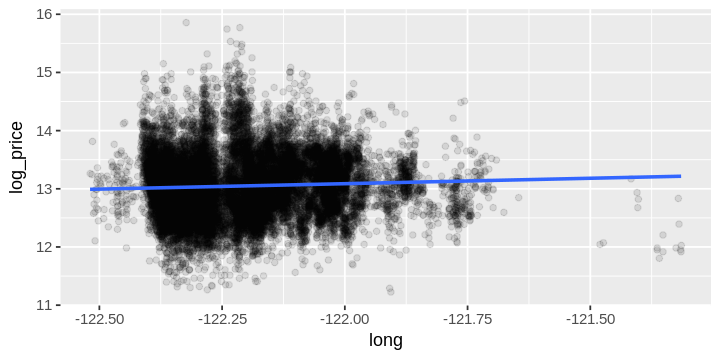

In [12]:
# Define the axes in character vectors

x_cols <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "zipcode", "lat", "long")

for (x_cols in x_cols) {

    y_cols <- c("log_price")

# generate scatter plot 
gg_scatter <- ggplot(house, aes_string(x = x_cols, y = y_cols)) + 
       geom_jitter(alpha = 0.1) +
      geom_smooth(method = "gam", se = FALSE)
    
# print plot
print(gg_scatter)
    
}



<div class="alert alert-block alert-info">Observations:</div>
zipcode & long exhibit essentially no trend with respect to log of price 
   I also tried using method=”loess” but it did not product as good of plots 
      
The following features have significant numbers of zeros or missing values 
   View = real values, waterfront = real values, bathrooms = missing values, sqft_basement = real

The following features appear to have a strong trend with log price 
       Strong : sqft_living, sqft_above, bedrooms, bathrooms, waterfront, view, grade
       Some are linearly correlated and some are more correlated by groups


Next, I will explore the relationship between the label and the categorical features. By categorical features in this case we mean features with named categories or with a small number of discrete numeric values. These features include:

- bedrooms
- bathrooms
- floors
- zipcode
- waterfront
- view_fac
- condition
- grade

I used ggplot2 to create box plots, of log price stratified by the values of these variables.


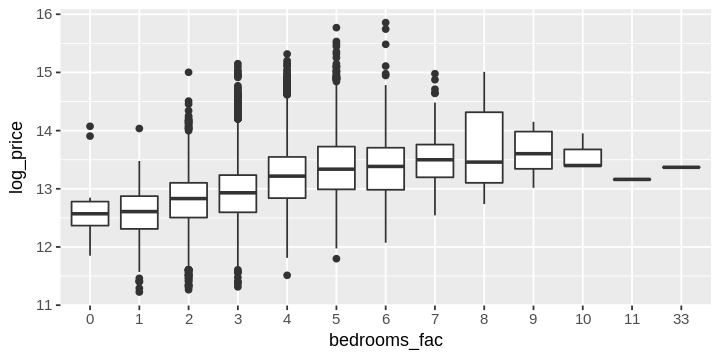

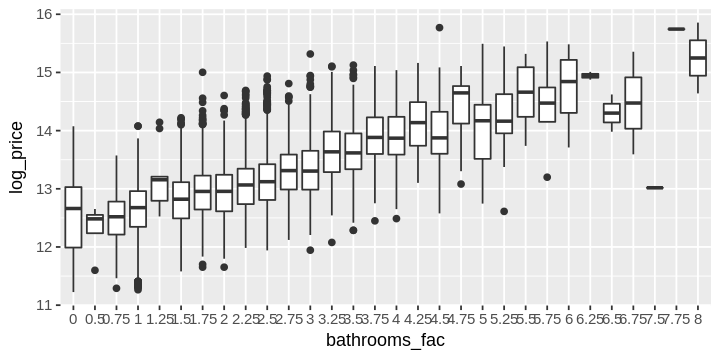

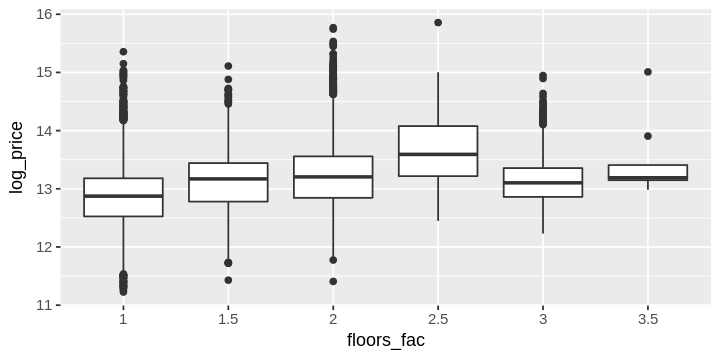

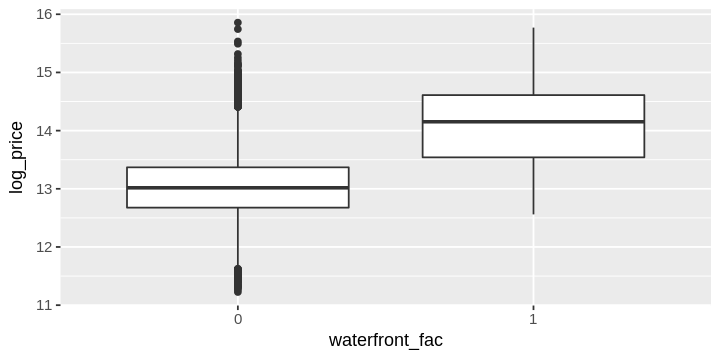

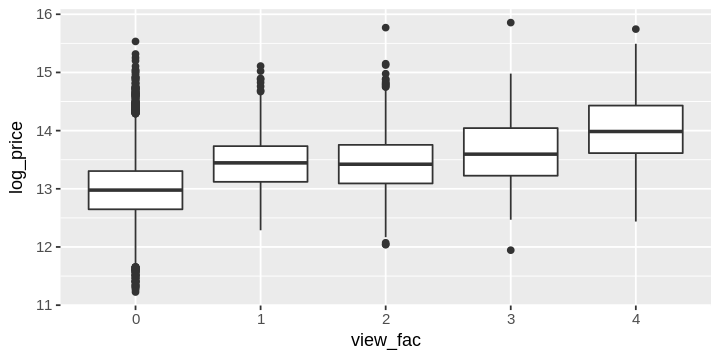

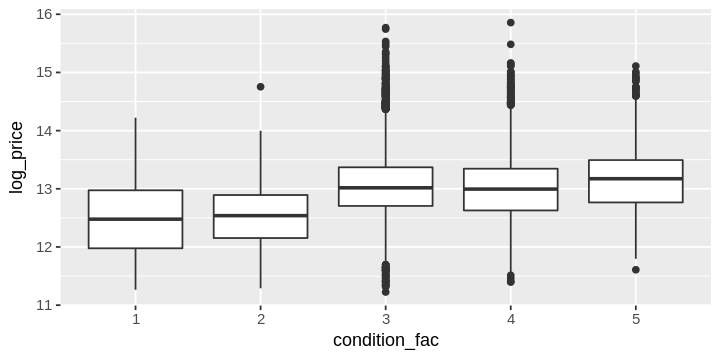

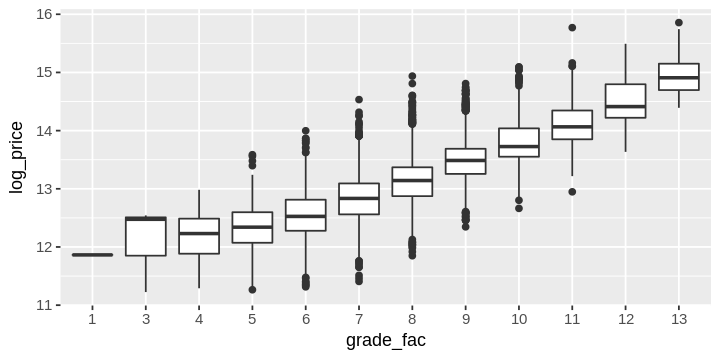

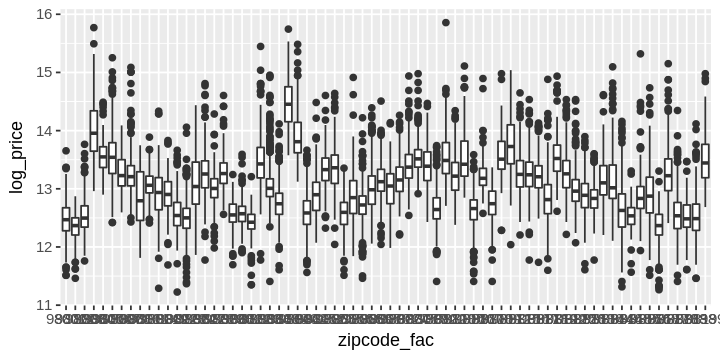

In [13]:
# Define the axes in character vectors

x_cols <- c("bedrooms_fac", "bathrooms_fac", "floors_fac", "waterfront_fac", "view_fac", "condition_fac", "grade_fac", "zipcode_fac")

for (x_cols in x_cols) {

    y_cols <- c("log_price")

# generate scatter plot 
gg_boxplot <- ggplot(house, aes_string(x = x_cols, y = y_cols)) + 
       geom_boxplot()
    
# print plot
print(gg_boxplot)
    
}


<div class="alert alert-block alert-info">Observations:</div>

Most of these plots show a significant changes in log price. For example, waterfront homes cost more than other homes, and homes with greater numbers of bedrooms, bathrooms, or grade, cost more than lesser homes. 
Excluding zip code, these features do not exhibit a clear trend...

floors_fac

condition_fac shows slight but weak correlation
      
There are noticeable differences between some zipcodes, but these plots are not showing a “trend”

There is a potential pit fall in the previous analyses. It is evident that the size of the living area is a significant factor in the price of the house. So I will apply a normalization and explore the relationship between log price per square foot and  the features. 

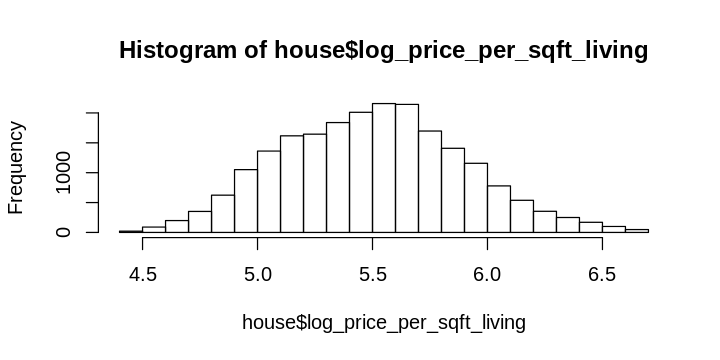

In [14]:
#glimpse(house)

house <- house %>% mutate(log_price_per_sqft_living = log(price/sqft_living))

#glimpse(house)

hist(house$log_price_per_sqft_living)


<div class="alert alert-block alert-info">

This looks pretty symmetric.

Next, I will explore the relationship between this new variable and the other features. 


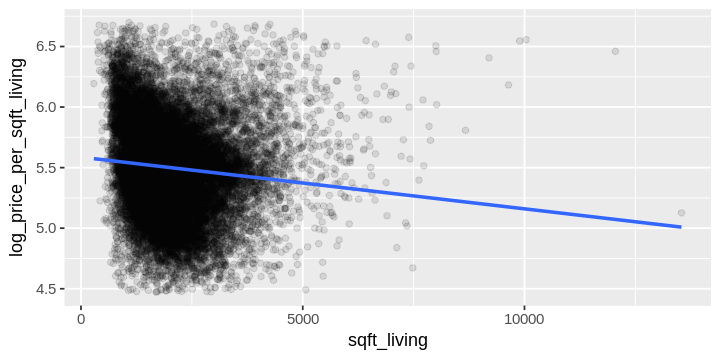

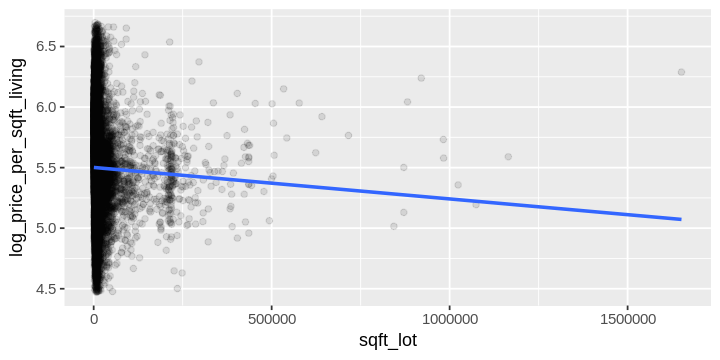

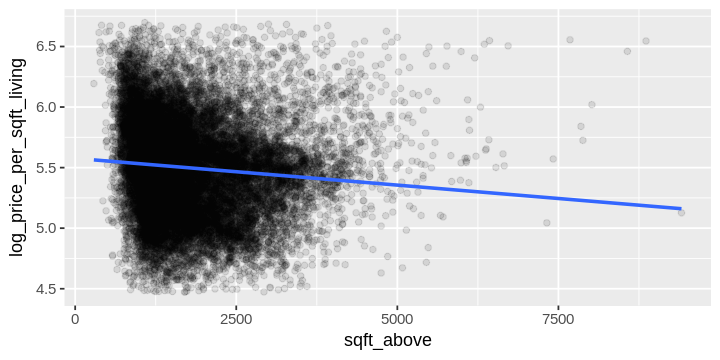

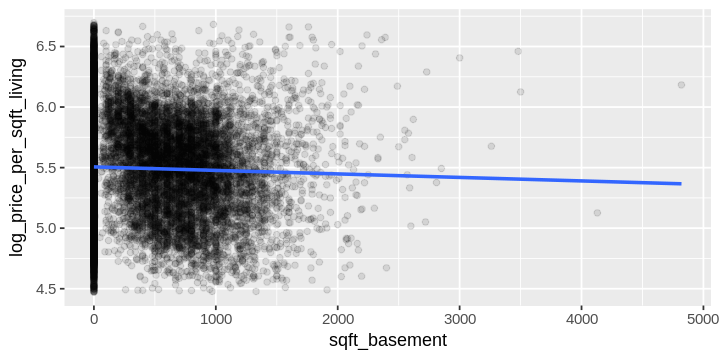

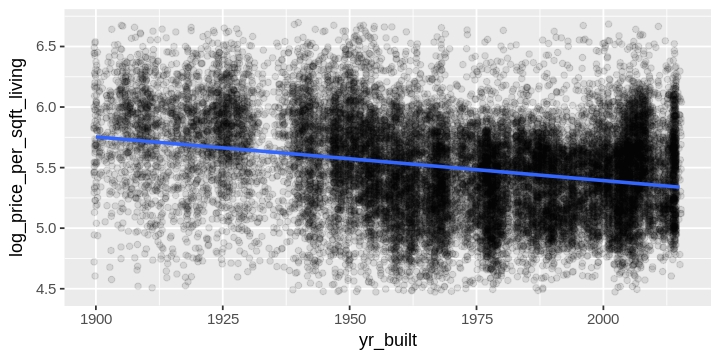

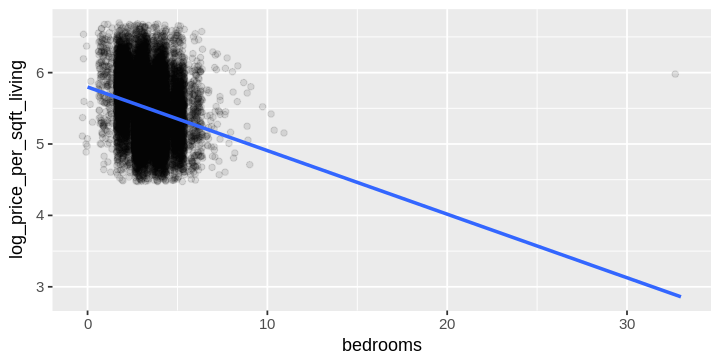

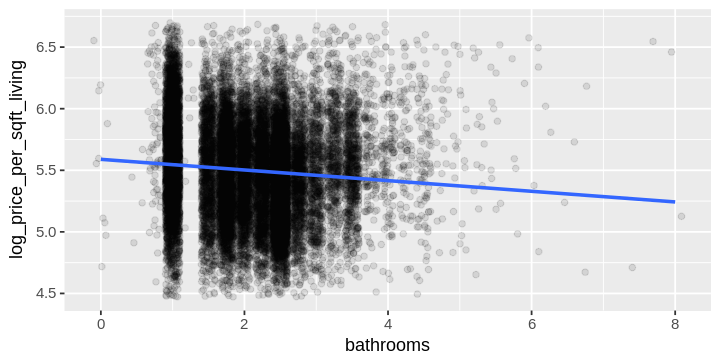

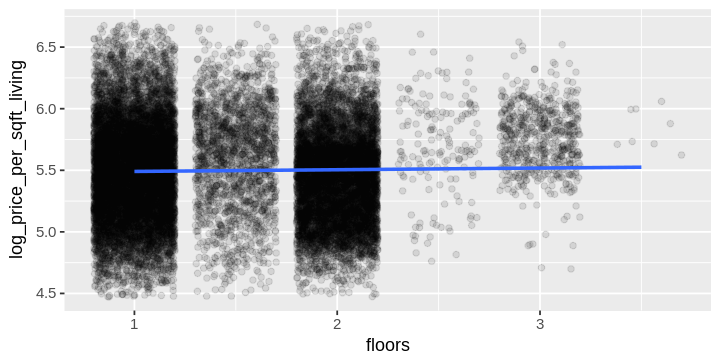

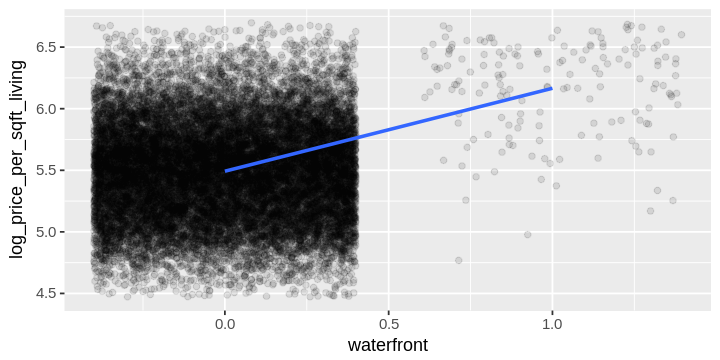

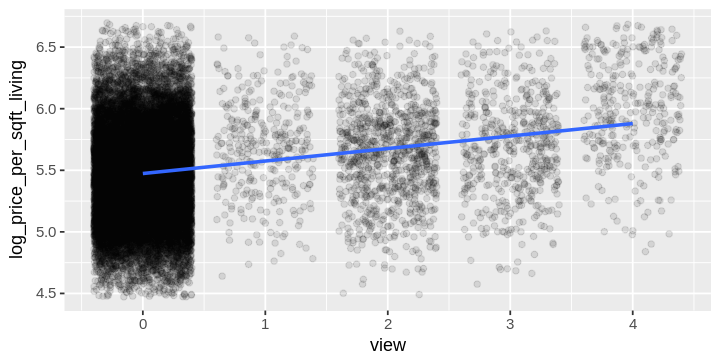

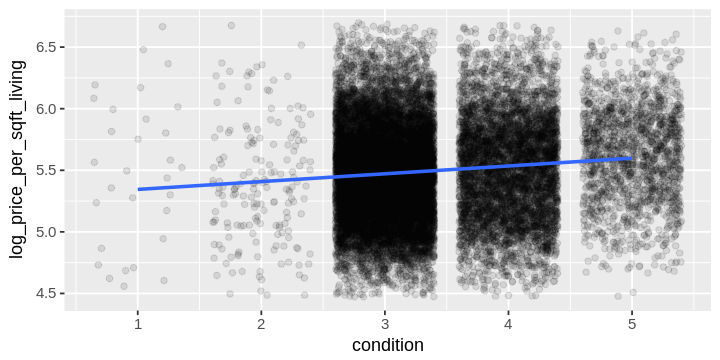

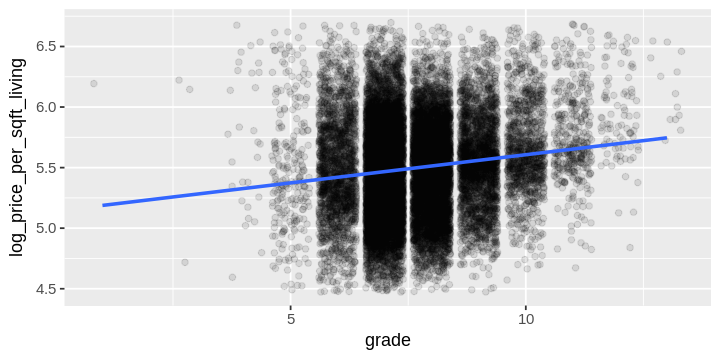

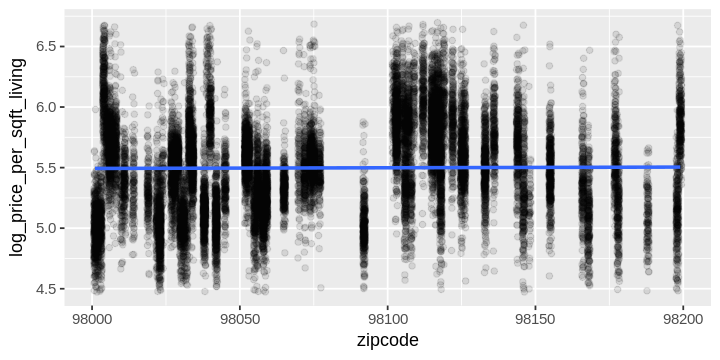

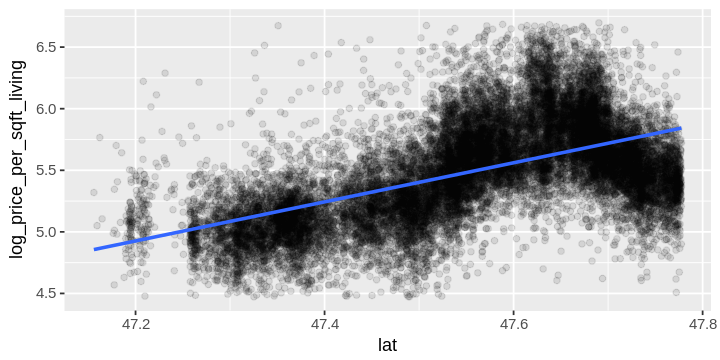

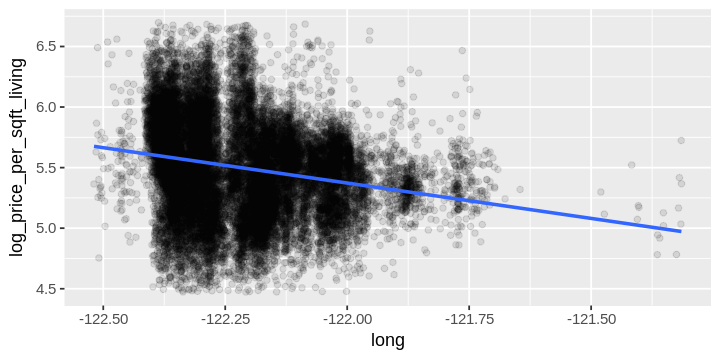

In [15]:
# Define the axes in character vectors

x_cols <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "zipcode", "lat", "long")

for (x_cols in x_cols) {

    y_cols <- c("log_price_per_sqft_living")

# generate scatter plot 
gg_scatter <- ggplot(house, aes_string(x = x_cols, y = y_cols)) + 
       geom_jitter(alpha = 0.1) +
      geom_smooth(method = "gam", se = FALSE)
    
# print plot
print(gg_scatter)
    
}


<div class="alert alert-block alert-info">Observations:</div>
 
There’s a slight negative correlation, the log of price per sqft living goes down as sqft living goes up.

Log of price per sqft living goes up as age goes up.

Now, I will examine the relationship between the log price per square foot and the categorical features. 

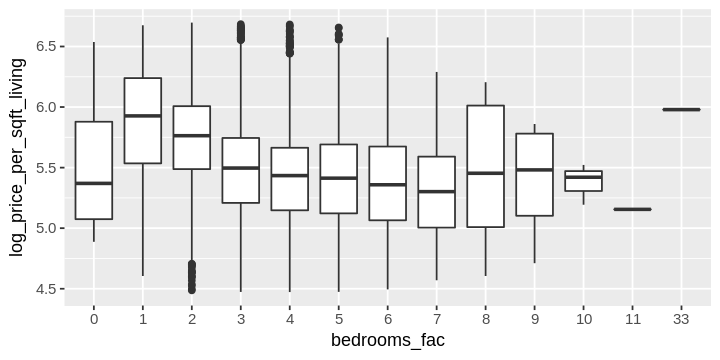

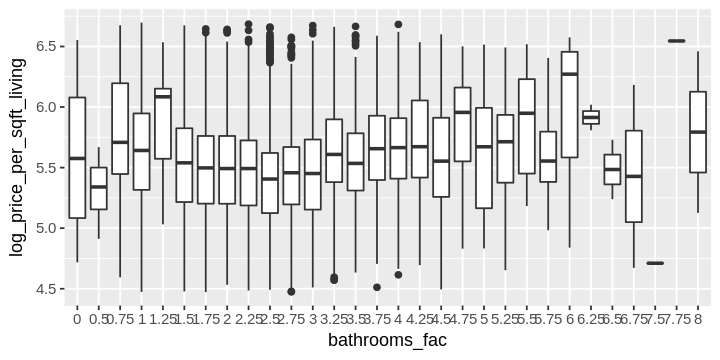

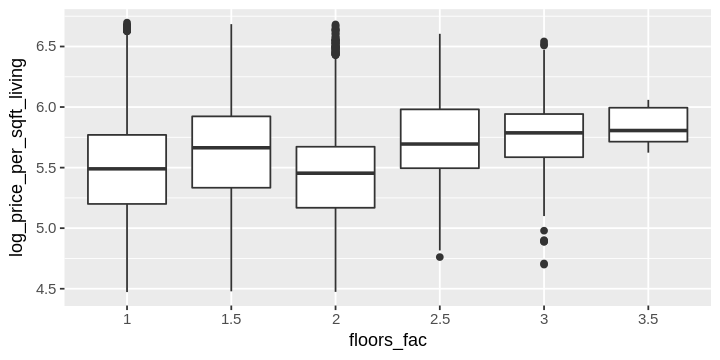

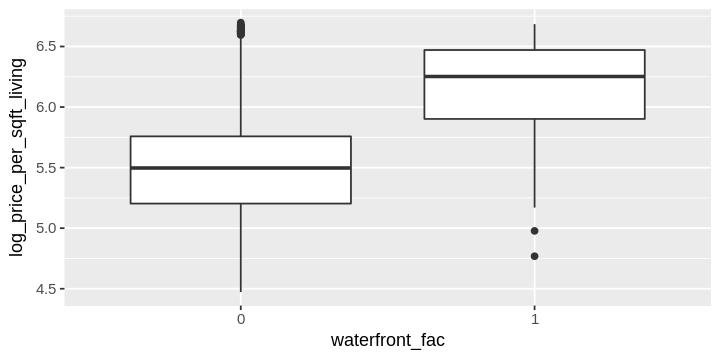

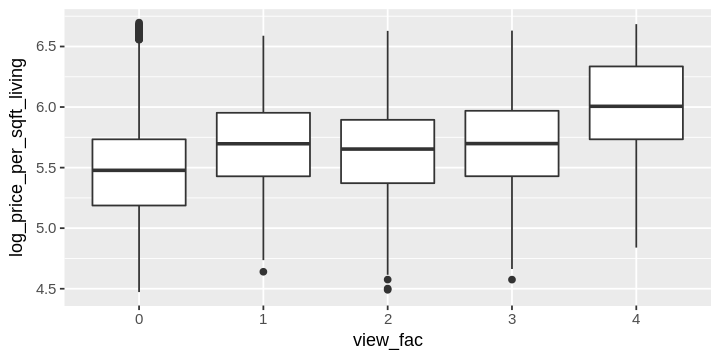

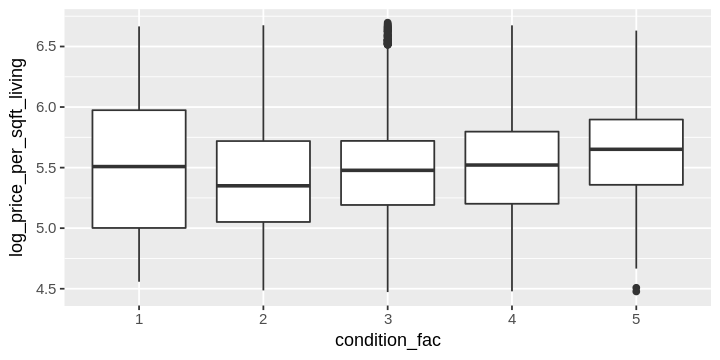

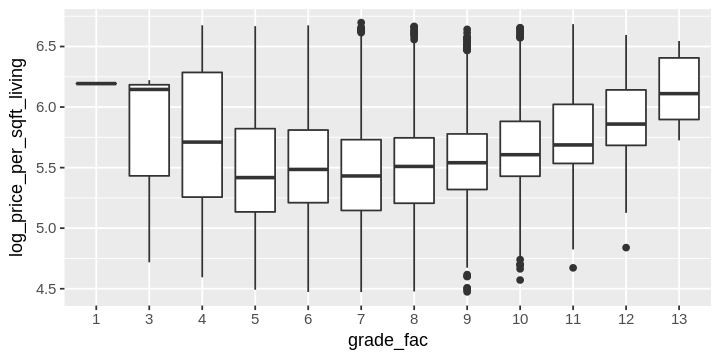

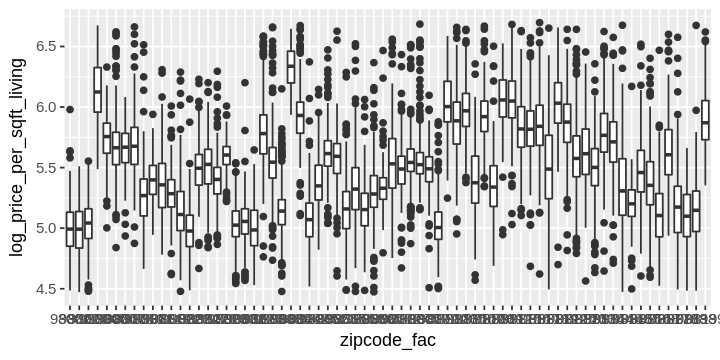

In [16]:
# Define the axes in character vectors

x_cols <- c("bedrooms_fac", "bathrooms_fac", "floors_fac", "waterfront_fac", "view_fac", "condition_fac", "grade_fac", "zipcode_fac")

for (x_cols in x_cols) {

    y_cols <- c("log_price_per_sqft_living")

# generate plot 
gg_boxplot <- ggplot(house, aes_string(x = x_cols, y = y_cols)) + 
       geom_boxplot()
    
# print plot
print(gg_boxplot)
    
}

<div class="alert alert-block alert-info">Observations:</div>
      Waterfront_fac is the most consistent influence on log price per square foot.
      I would say that View_fac is the next most consistent.
      Grade_fac has a nice relationship, but due to “trough” like curve it’s not as consistent.
      Condition_fac has a consistent trend but not as strong.  Also, this feature is likely more applicable to existing homes rather than newly built homes so of less interest to the audience.
      There noticeable differences in log price per square foot between different zip code areas but this visualization does not.


The correlation of the log of price vs. `sqft_living` is not perfectly straight. Is it possible to improve this situation with some kind of transformation? 

I will try the following:
1. Use dplyr to compute the square root and log of `sqft_living`, and add these new features to the data frame.
2. Plot the histogram of these new features. 

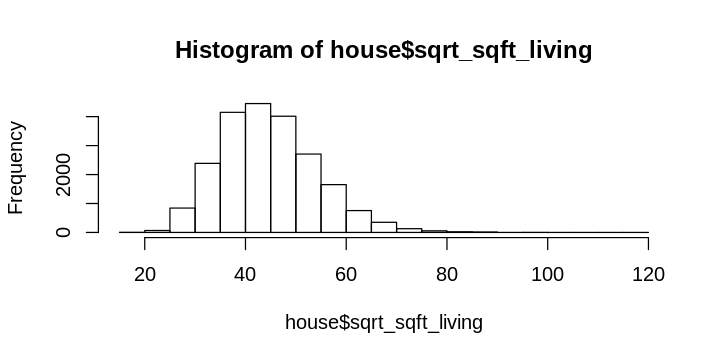

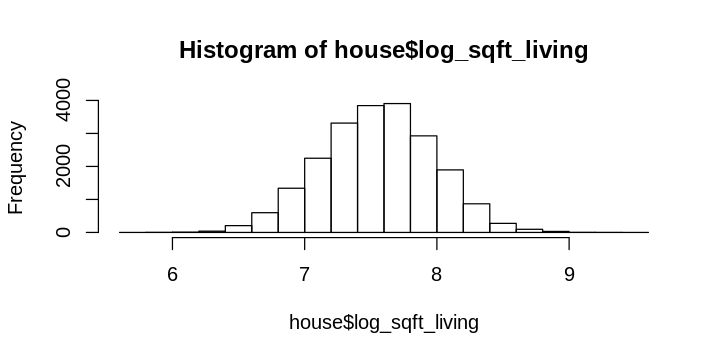

In [17]:
house <- house %>% mutate(sqrt_sqft_living = sqrt(sqft_living)) %>%
                   mutate(log_sqft_living = log(sqft_living)) %>%
                   mutate(log_sqft_lot = log(sqft_lot)) %>%
                   mutate(log_sqft_above = log(sqft_above))

#Needed to also Normailzie -> sqft_lot and sqft_above

#glimpse(house)

hist(house$sqrt_sqft_living)
hist(house$log_sqft_living)


<div class="alert alert-block alert-info">

Log_sqft_living is more symmetric

I will investigate the relationship between the square root of living area and log price and compare to the relationship living area and log price. 

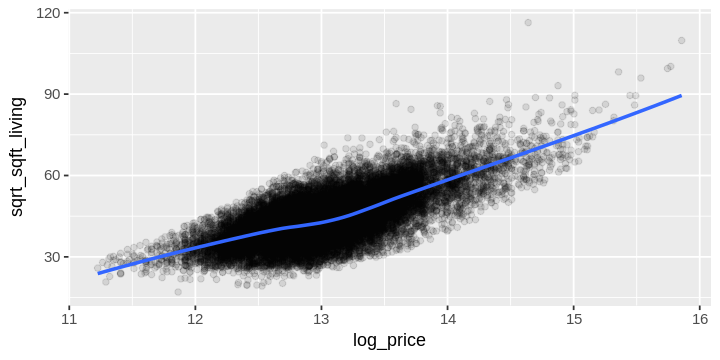

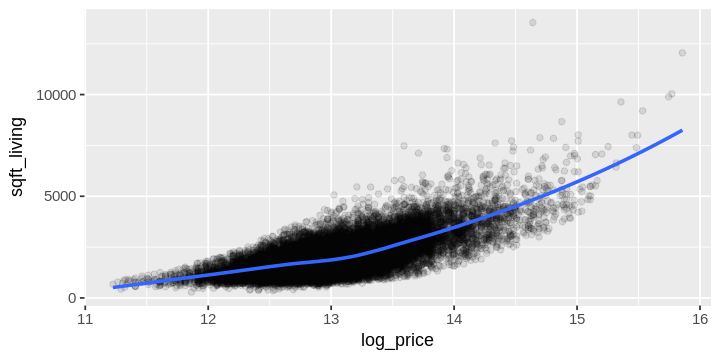

In [18]:
# Define the axes in character vectors

y_cols <- c("sqrt_sqft_living", "sqft_living")

for (y_cols in y_cols) {

    x_cols <- c("log_price")

# generate scatter plot 
gg_scatter <- ggplot(house, aes_string(x = x_cols, y = y_cols)) + 
       geom_jitter(alpha = 0.1) +
      geom_smooth(method = "loess", se = FALSE)
    
# print plot
print(gg_scatter)
    
}


<div class="alert alert-block alert-info">

They look very similar but the sqrt of living area has a slightly steeper slope on the scale plotted.

## Summary Statistics

Now that I have visually explored the data set, you will now use summary statistical methods to explore the relationships in the data. Now I will investigate the significance of some of these differences.

### Two population tests

First, I will investigate the significance in the differences in prices between waterfront homes and non-waterfront homes to confirm the apparent price difference is indeed significant using a two sample t-test. I used dplyr to create data frames for waterfront homes and non-waterfront homes. 

In [19]:
t.test(house$price[house$waterfront == "0"], house$price[house$waterfront == "1"])


	Welch Two Sample t-test

data:  house$price[house$waterfront == "0"] and house$price[house$waterfront == "1"]
t = -12.876, df = 162.23, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1303661.6  -956963.3
sample estimates:
mean of x mean of y 
 531563.6 1661876.0 


<div class="alert alert-block alert-info">

Null hypothesis: the *difference between the price of waterfront and non-waterfront* homes is not significant</div>

The P-val is far less than 0.05 so the null hypothesis can be rejected.

Next I will investigate the log price per square foot for waterfront vs. non-waterfront homes. 

In [20]:
t.test(house$log_price_per_sqft_living[house$waterfront == "1"], house$log_price_per_sqft_living[house$waterfront == "0"], alternative ="greater") 


	Welch Two Sample t-test

data:  house$log_price_per_sqft_living[house$waterfront == "1"] and house$log_price_per_sqft_living[house$waterfront == "0"]
t = 22.284, df = 164.55, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.6234271       Inf
sample estimates:
mean of x mean of y 
 6.165819  5.492403 


<div class="alert alert-block alert-info">
Null hypothesis: the *log price per square foot* for waterfront homes is less than or equal to than non-waterfront homes </div>

The P-val is far less than 0.05 so the null hypothesis can be rejected.

It is also possible that waterfront homes are simply larger than non-waterfront homes. So let's investigate to see if this is true.

In [21]:
#boxplot(house$sqft_living ~ house$waterfront)
#?t.test()

t.test(house$sqft_living[house$waterfront == "1"], house$sqft_living[house$waterfront == "0"], alt="greater")


	Welch Two Sample t-test

data:  house$sqft_living[house$waterfront == "1"] and house$sqft_living[house$waterfront == "0"]
t = 8.7506, df = 162.78, p-value = 1.284e-15
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 893.7512      Inf
sample estimates:
mean of x mean of y 
 3173.687  2071.588 


<div class="alert alert-block alert-info">
Null hypothesis: the *size* of waterfront homes is greater than or equal to non-waterfront homes</div>

The P-val is far less than 0.05 so the null hypothesis can be rejected.

### Grouped aggregations and summaries

Until now I have investigated relationships between waterfront homes and non-waterfront homes. Now, I will investigate the effects of location. In particular, the effect of zip code area on the prices and characteristics of homes.  

As a first step I will create perform the following:
1. Group the table by the zip code.
2. For each group, compute the following summary statistics for the homes in the groups
  - Number (count)
  - Mean log price
  - Median log price
  - Standard deviation of the log of price
  - Mean log price per square foot 
  - Median log price per square foot
  - Standard deviation of log price per square foot
3. Sort the groups by mean price
  
Then I will Print and examine the resulting summary tables for the 10 rows of the most and least expensive mean price zip codes. 

In [22]:
#?summarize 

house_groupedbyzip <- house %>% group_by(zipcode) %>% summarize(count=n(), 
                                 mean_log_price=mean(log_price), 
                                 median_log_price=median(log_price),
                                 sdev_log_price=sd(log_price), 
                                 mean_log_price_per_sqft=mean(log_price_per_sqft_living),
                                 median_log_price_per_sqft=median(log_price_per_sqft_living),
                                 sdev_log_price_per_sqft=sd(log_price_per_sqft_living), 
                                 mean_log_sqft_living=mean(log_sqft_living)) %>%
                         arrange(desc(mean_log_price))
print(house_groupedbyzip)

# A tibble: 70 x 9
   zipcode count mean_log_price median_log_price sdev_log_price
     <int> <int>          <dbl>            <dbl>          <dbl>
 1   98039    50       14.47003         14.45339      0.4745788
 2   98004   317       14.00838         13.95527      0.4537474
 3   98040   282       13.90256         13.80924      0.4012818
 4   98112   269       13.77928         13.72668      0.4988403
 5   98109   109       13.58536         13.50899      0.4403891
 6   98102   105       13.56355         13.48701      0.4748035
 7   98006   498       13.56241         13.54132      0.4360199
 8   98005   168       13.56010         13.54824      0.2904471
 9   98119   184       13.55992         13.52108      0.4057914
10   98105   229       13.55873         13.42247      0.4396038
# ... with 60 more rows, and 4 more variables: mean_log_price_per_sqft <dbl>,
#   median_log_price_per_sqft <dbl>, sdev_log_price_per_sqft <dbl>,
#   mean_log_sqft_living <dbl>


<div class="alert alert-block alert-info">Observations:</div>
Note that the mean or median log prices for the lowest and highest priced zip code areas overlap.

Note the mean or median log prices per square foot for the lowest and highest priced zip code areas overlap.

Note that the Standard Deviations are generally an order of magnitude smaller than the means.  This would indicate prices are fairly consistent within a zipcode.


Next, I will determine which features might be significant in determining the differences in prices of homes by zip code area using a t-test to determine if the differences in log prices per square foot are significant between the 10 highest and 10 lowest zip code areas. 

The log price per square foot is used since the visualization revealed that this transformed feature was closer to a Normal distribution that the price per square foot. 

I will do this as follows:
1.	Use the head and tail functions to find the 10 zip codes for the highest and lowest priced areas.
2.	Filter the data set for two subsets; one for high priced and low priced areas. The goal is to find all the rows in each of the zip code areas, so I can reference the values needed for the t-tests.


In [23]:
hiprice_groupedbyzip <- house_groupedbyzip %>% arrange(desc(mean_log_price_per_sqft)) %>% head (10)
                                                       
lowprice_groupedbyzip <- house_groupedbyzip %>% arrange(desc(mean_log_price_per_sqft)) %>% tail (10)

#house_groupedbyzip %>% summary() # %>% print()
#lowprice_groupedbyzip %>% summary() # %>% print()
#hiprice_groupedbyzip %>% summary() # %>% print()

t.test(hiprice_groupedbyzip$mean_log_price_per_sqft, lowprice_groupedbyzip$mean_log_price_per_sqft, alt="greater")



	Welch Two Sample t-test

data:  hiprice_groupedbyzip$mean_log_price_per_sqft and lowprice_groupedbyzip$mean_log_price_per_sqft
t = 24.267, df = 10.7, p-value = 5.311e-11
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.9275786       Inf
sample estimates:
mean of x mean of y 
 6.033178  5.031263 


<div class="alert alert-block alert-info">Null hypothesis: the *log price per square foot* of the high priced zip code areas are less than or equal to the low priced areas. </div>

The P-val is far less than 0.05 so the null hypothesis can be rejected.

Now I will investigate if the difference in the log square foot of living area is significantly larger for high mean cost zip code areas than low cost areas using a t.test on the log of square foot living area for the 10 highest cost and lowest cost zip coded areas. Again, I'm using the log transformed variables since it is closer to a Normal distribution.  

In [24]:
#added mean_log_sqft_living to the summarise function in earlier code block
#re-sort by log price rather than log price per sqft as stated by question above

hiprice_groupedbyzip2 <- house_groupedbyzip %>% arrange(desc(mean_log_price)) %>% head (10)                                                      
lowprice_groupedbyzip2 <- house_groupedbyzip %>% arrange(desc(mean_log_price)) %>% tail (10)

#lowprice_groupedbyzip2 %>% glimpse() # summary() # %>% print()
#hiprice_groupedbyzip2 %>%  glimpse() # summary() # %>% print()

t.test(hiprice_groupedbyzip2$mean_log_sqft_living, lowprice_groupedbyzip2$mean_log_sqft_living, alt="greater")


	Welch Two Sample t-test

data:  hiprice_groupedbyzip2$mean_log_sqft_living and lowprice_groupedbyzip2$mean_log_sqft_living
t = 4.9623, df = 12.362, p-value = 0.0001508
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.2343974       Inf
sample estimates:
mean of x mean of y 
 7.763970  7.398699 


<div class="alert alert-block alert-info" >
Null hypothesis: the *log of square foot living area* of the high priced zip code areas are less than or equal to the low priced areas?</div>

The P-val is far less than 0.05 so the null hypothesis can be rejected.

Next I will investigate if homes with more bedrooms and bathrooms are more expensive in general. As a first step, I will use dplyr verbs to compute the mean and  median of the number of bathrooms and bedrooms for the 10 highest and lowest median priced zip code areas. 

In [25]:
bathndbeds_groupedbyzip <- house %>% group_by(zipcode) %>% summarize(count=n(), 
                                 mean_log_price=mean(log_price), 
                                 median_log_price=median(log_price),
                                 sdev_log_price=sd(log_price), 
                                 mean_log_price_per_sqft=mean(log_price_per_sqft_living),
                                 median_log_price_per_sqft=median(log_price_per_sqft_living),
                                 sdev_log_price_per_sqft=sd(log_price_per_sqft_living), 
                                 mean_log_sqft_living=mean(log_sqft_living), 
                                 mean_bathrooms=mean(bathrooms),
                                 median_bathrooms=median(bathrooms),
                                 mean_bedrooms=mean(bedrooms),
                                 median_bedrooms=median(bedrooms)) %>%
                         arrange(desc(mean_log_price))
#print(bathndbeds_groupedbyzip)

hiprice_groupedbyzip3 <- bathndbeds_groupedbyzip %>% arrange(desc(mean_log_price)) %>% head (10)                                                      
lowprice_groupedbyzip3 <- bathndbeds_groupedbyzip %>% arrange(desc(mean_log_price)) %>% tail (10)

summary(hiprice_groupedbyzip3$mean_bedrooms)
summary(lowprice_groupedbyzip3$mean_bedrooms)

summary(hiprice_groupedbyzip3$mean_bathrooms)
summary(lowprice_groupedbyzip3$mean_bathrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.193   3.323   3.711   3.640   3.854   4.060 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.996   3.213   3.342   3.294   3.390   3.434 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.158   2.234   2.399   2.460   2.549   3.200 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.433   1.746   1.817   1.827   1.971   2.062 

<div class="alert alert-block alert-info">
Observations: </div>

Yes, the highest priced zipcodes have more bedrooms and bathrooms,

Now, the questions are if the differences in the number of bedrooms and bathrooms in the 10 highest price and lowest price zip code areas are significant. I will use a one sided t-test to determine if these differences are significant.

In [26]:
t.test(hiprice_groupedbyzip3$mean_bedrooms, lowprice_groupedbyzip3$mean_bedrooms, alt="greater")
t.test(hiprice_groupedbyzip3$mean_bathrooms, lowprice_groupedbyzip3$mean_bathrooms, alt="greater")


	Welch Two Sample t-test

data:  hiprice_groupedbyzip3$mean_bedrooms and lowprice_groupedbyzip3$mean_bedrooms
t = 3.0124, df = 12.208, p-value = 0.005315
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1414141       Inf
sample estimates:
mean of x mean of y 
 3.639847  3.294255 



	Welch Two Sample t-test

data:  hiprice_groupedbyzip3$mean_bathrooms and lowprice_groupedbyzip3$mean_bathrooms
t = 5.4121, df = 14.598, p-value = 3.958e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4274248       Inf
sample estimates:
mean of x mean of y 
 2.460109  1.827353 


<div class="alert alert-block alert-info">Observations:</div>

Null hypothesis: the number of bedrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. 

The P-val is far less than 0.05 so the null hypothesis can be rejected.

Null hypothesis that the number of bathrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. 

The P-val is far less than 0.05 so the null hypothesis can be rejected.


## Prediction of Home Price

I've now explored the data set and tested the significance of some of the relationships in the data. Now, I will compute and test a linear regression model to predict the price of homes in King County. 

As a first step, I will compute a linear regression model and print the summary and coefficient confidence intervals to predict the log price of homes. Some features, such as `ID` are known to not be useful in predicting price. The model will use the following features:
- bedrooms
- bathrooms
- sqft_living             
- sqft_lot
- floors
- waterfront            
- view
- condition
- grade
- sqft_above 
- square root of sqft_living
- log of sqft_living

**Note:** I have to scale the features before computing the model using `lapply` with the R `scale` function to iterate over the numeric feature columns. 

In [27]:
prediction_data <- house %>% select(price, bedrooms, bathrooms,sqft_living, sqft_lot, log_sqft_lot, floors, 
                                    waterfront, view, condition, grade, sqft_above, log_sqft_above, 
                                    sqrt_sqft_living, log_sqft_living, log_price)
#-------------------------------------------------
# peek at data frame
#prediction_data %>% glimpse()
#
#-------------------------------------------------
# Review distributions of column data
# Create a for loop and call gg_histogram
# Use prediction_data and hplots_prediction
#
#hplots_prediction <- c("sqft_living", "sqrt_sqft_living", "log_sqft_living","sqft_lot", "log_sqft_lot",
#                       "sqft_above", "log_sqft_above")
#
#for(hplots_prediction in hplots_prediction) {
#
#gg_histogram <- ggplot(prediction_data, aes_string(x=hplots_prediction), environment = environment()) +   
#                geom_histogram(aes(y=..count..), bins=50, color="black", fill="white")  +
#                geom_density(size = 1)
#
#print(gg_histogram)
#}

#Note:  Need to Normailzie -> sqft_lot and sqft_above 
#Note:  Need to Replace sqft_living and sqrt_sqft_living with log_sqft_living
#---------------------------------------------------
#
# Need to scale these features

normalize = function(x) (x - mean(x))/sd(x)
Nprediction_data = prediction_data %>% mutate(bedrooms=normalize(bedrooms), bathrooms=normalize(bathrooms),
                                             sqft_living=normalize(sqft_living), 
                                             sqft_lot=normalize(sqft_lot), log_sqft_lot=normalize(sqft_lot),
                                             floors=normalize(floors), waterfront=normalize(waterfront), 
                                             view=normalize(view), condition=normalize(condition), 
                                             grade=normalize(grade), sqft_above=normalize(sqft_above), 
                                             log_sqft_above=normalize(log_sqft_above), 
                                             sqrt_sqft_living=normalize(sqrt_sqft_living), 
                                             log_sqft_living=normalize(log_sqft_living))


model1<- lm(Nprediction_data$log_price ~ Nprediction_data$bedrooms + Nprediction_data$bathrooms + 
            Nprediction_data$log_sqft_living + Nprediction_data$log_sqft_lot + Nprediction_data$floors +
            Nprediction_data$waterfront + Nprediction_data$view + Nprediction_data$condition + 
            Nprediction_data$grade + Nprediction_data$log_sqft_above)

summary(model1)
confint(model1)


Call:
lm(formula = Nprediction_data$log_price ~ Nprediction_data$bedrooms + 
    Nprediction_data$bathrooms + Nprediction_data$log_sqft_living + 
    Nprediction_data$log_sqft_lot + Nprediction_data$floors + 
    Nprediction_data$waterfront + Nprediction_data$view + Nprediction_data$condition + 
    Nprediction_data$grade + Nprediction_data$log_sqft_above)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37656 -0.24003  0.01047  0.22009  1.40880 

Coefficients:
                                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                      13.0478169  0.0022918 5693.220  < 2e-16 ***
Nprediction_data$bedrooms        -0.0185555  0.0030445   -6.095 1.11e-09 ***
Nprediction_data$bathrooms       -0.0050041  0.0039077   -1.281    0.200    
Nprediction_data$log_sqft_living  0.2323469  0.0061173   37.982  < 2e-16 ***
Nprediction_data$log_sqft_lot    -0.0006443  0.0023482   -0.274    0.784    
Nprediction_data$floors           0.0285647  0.0031152    9

2.5 %       97.5 %      
(Intercept)                      13.04332479 13.052309047
Nprediction_data$bedrooms        -0.02452294 -0.012587983
Nprediction_data$bathrooms       -0.01266351  0.002655230
Nprediction_data$log_sqft_living  0.22035660  0.244337252
Nprediction_data$log_sqft_lot    -0.00524688  0.003958231
Nprediction_data$floors           0.02245869  0.034670651
Nprediction_data$waterfront       0.02658491  0.036413959
Nprediction_data$view             0.05752784  0.067840654
Nprediction_data$condition        0.05480208  0.064236514
Nprediction_data$grade            0.23607133  0.251046413
Nprediction_data$log_sqft_above  -0.08952371 -0.068057047

<div class="alert alert-block alert-info">
Obervations of the summary and the confidence intervals of the coefficients for the linear regression model: </div>

Floors is not significant.

Now, I will update the model until all features have significant coefficients, removing features that do not have significant coefficients one at a time until all model coefficients are significant. 

In [28]:
model2<- lm(Nprediction_data$log_price ~ Nprediction_data$bedrooms +  
            Nprediction_data$log_sqft_living + Nprediction_data$floors +
            Nprediction_data$waterfront + Nprediction_data$view + Nprediction_data$condition + 
            Nprediction_data$grade + Nprediction_data$log_sqft_above)

summary(model2)


Call:
lm(formula = Nprediction_data$log_price ~ Nprediction_data$bedrooms + 
    Nprediction_data$log_sqft_living + Nprediction_data$floors + 
    Nprediction_data$waterfront + Nprediction_data$view + Nprediction_data$condition + 
    Nprediction_data$grade + Nprediction_data$log_sqft_above)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37562 -0.24021  0.01017  0.21992  1.41203 

Coefficients:
                                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                      13.047817   0.002292 5693.257  < 2e-16 ***
Nprediction_data$bedrooms        -0.019089   0.002999   -6.365 1.99e-10 ***
Nprediction_data$log_sqft_living  0.229301   0.005643   40.632  < 2e-16 ***
Nprediction_data$floors           0.027346   0.002924    9.352  < 2e-16 ***
Nprediction_data$waterfront       0.031481   0.002507   12.557  < 2e-16 ***
Nprediction_data$view             0.062633   0.002628   23.829  < 2e-16 ***
Nprediction_data$condition        0.059677   0.002404  

<div class="alert alert-block alert-info">
Notes: </div>

I replaced sqft above with log_sqft_above before creating the 1st model.

I removed bathrooms and log_sqft_lot after creating 1st model.


Now that I have a model with all coefficients significant I will investigate the residuals of the model using dplyr verbs to score the model using the `predict` method and compute the residuals. 

In [29]:
Nprediction_data = Nprediction_data %>% mutate(score = predict(model2, data = Nprediction_data)) %>%
                            mutate(resids = log_price - score,
                            predicted_price = exp(score))

prediction_results <- Nprediction_data %>% select(price, log_price, score, resids, predicted_price)

#prediction_results %>% head(20)
#prediction_results %>% tail(20)


Next, I will visualize the properties of the residuals. The residuals should be approximately Normal for a linear model. I will use ggolot2 to display a histogram along with a q-q Normal plot of the residuals. 

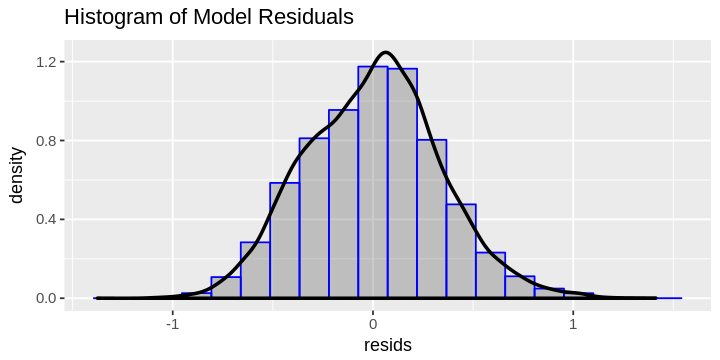

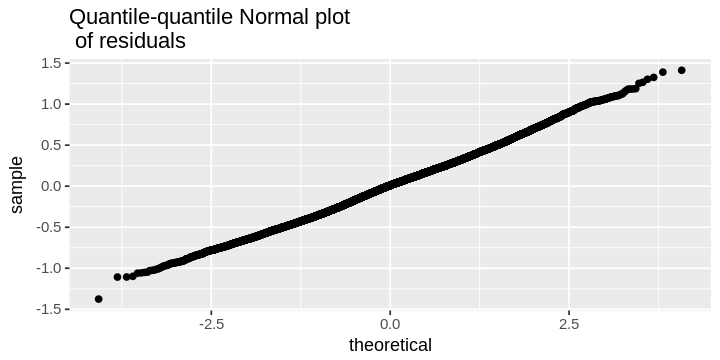

In [30]:
p1 <- ggplot(prediction_results, aes(x= resids, y= ..density..)) + 
                 geom_histogram(bins = 20, alpha = 0.3, color = 'blue') +
                ggtitle('Histogram of Model Residuals')+
                geom_density(size = 1)

p2 <- ggplot(prediction_results, aes(sample = resids)) + 
                 geom_qq() + 
                ggtitle('Quantile-quantile Normal plot \n of residuals')

print(p1)
print(p2)

#options(repr.plot.width=6, repr.plot.height=3) ## set the plot area size


<div class="alert alert-block alert-info">
Note: these residuals appear to be approximately Normally distributed because the histogram looks very symmetric and the Q-Q plot looks very linear.</div>

Another important properties of residuals is that they are homoscedastic. I will use ggplot2 to create a plot of the residuals vs. the scored (predicted) values and will use a loess trend line on the plot with `geom_smooth`. 

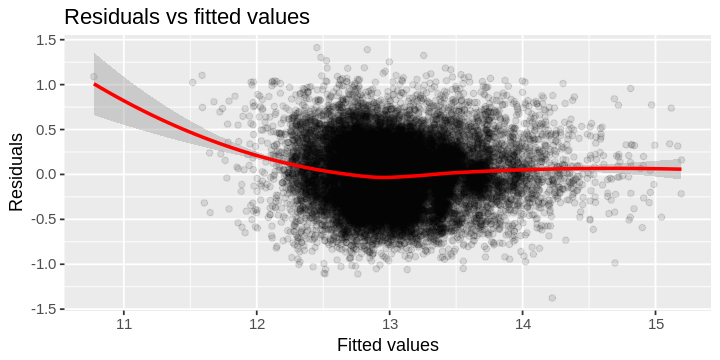

In [31]:
p3 <- ggplot(prediction_results, aes(score, resids)) + 
#   geom_point(size = 2) +
    geom_jitter(alpha = 0.1) +
    geom_smooth(method = 'loess', size = 1, color = 'red') +
    ggtitle('Residuals vs fitted values') +
    xlab('Fitted values') + ylab('Residuals')
             
print(p3)


<div class="alert alert-block alert-info">
I’m going to say the residuals are homosedastic. The fit is essentially linear; with exception of one outlier cluster, there are no linear trends, patterns or distinct step functions in the  residuals. I regenerated the plot with geom_jitter to be sure there wasn't a massive cluster of          points to the far left.</div>

## Summary

In this challenge the following was completed:
- Loaded the data set on the prices and features of homes in King County, Washington USA.
- Performed transformations on the label and features in the data set.
- Used visualizations to explore the relationships in the data set.
- Used summary statistics and hypothesis tests to verify some relationships in the data.
- Created and evaluated a linear regression model to predict the price of homes. 